<a href="https://colab.research.google.com/github/AnnaGass/DSA-SleepHealthData/blob/main/04_MultivarianteRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title # Select the subject to be used { display-mode: "both" }
subject = '027'

# Install python libraries and load packages

In [3]:
# @title Install needed libraries { display-mode: "both" }
!pip install pandas

In [4]:
# @title Import libraries { display-mode: "both" }
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# @title Define constants { display-mode: "both" }
output_directory = "subject" + subject + "/"

final_csv = 'base_data' + subject + ".csv"

In [8]:
# @title Create output directory for subject

if not os.path.exists(output_directory):
  os.makedirs(output_directory)

# Data Analysis

                            OLS Regression Results                            
Dep. Variable:                  Apnea   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     263.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.21e-167
Time:                        08:19:44   Log-Likelihood:                -21368.
No. Observations:               21426   AIC:                         4.274e+04
Df Residuals:                   21422   BIC:                         4.278e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.8791      0.236     24.885      

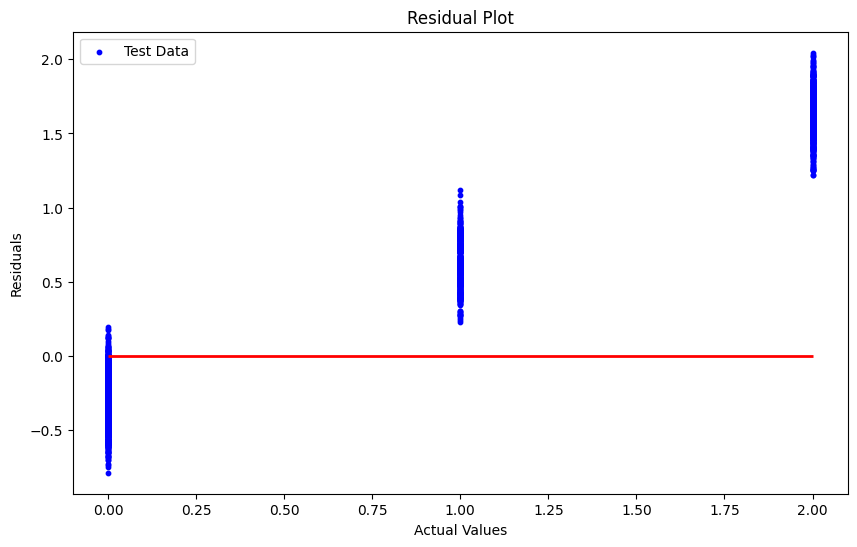

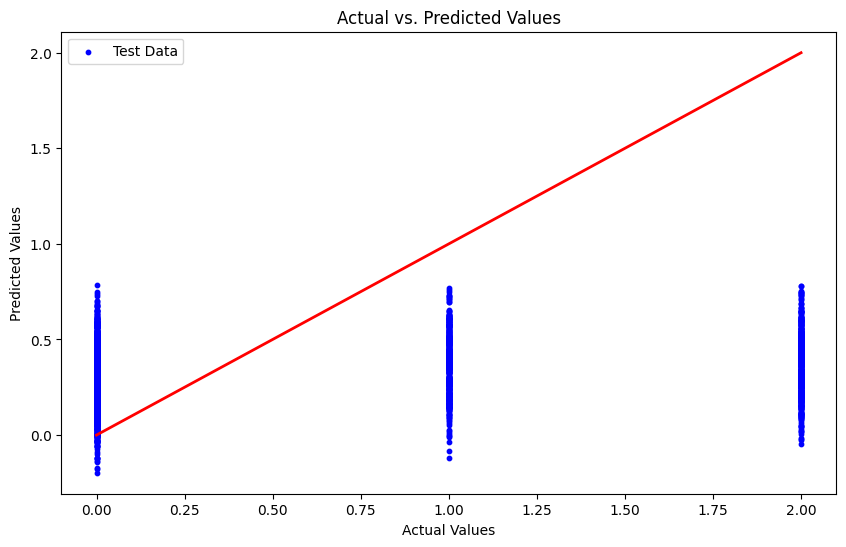

In [14]:
# @title Multivariate regression  { display-mode: "both" }

output_graph = output_directory + "Regression_Residual_Plot.png"
output_graph_comparison = output_directory + "Regression_Actual_vs_Predicted_Plot.png"
output_file = output_directory + "Regression_summary.txt"

# Load data
df = pd.read_csv(final_csv)

# Prepare the data
df['Apnea'] = df['Apnea'].map({'Nothing': 0, 'Apnea': 1, 'Hypoapnea': 2})

X = df[['SpO2', 'Pulse', 'Sleep Stage']]
y = df['Apnea']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train_const).fit()

# Print the model summary
print(model.summary())

# Make predictions
y_pred = model.predict(X_test_const)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Evaluate the model
plt.figure(figsize=(10, 6))

# Residual plot
plt.scatter(y_test, y_test - y_pred, color='blue', s=10, label='Test Data')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.savefig(output_graph)
plt.show()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=10, label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.savefig(output_graph_comparison)
plt.show()

# Save the accuracy and classification report to a text file
with open(output_file, 'w') as f:
    f.write(f'Mean Squared Error: {mse}')
    f.write(f'R-squared: {r2}')
    f.write(str(model.summary()))

**GER:**

Das Modell zeigt, dass sowohl SpO2 als auch Puls signifikante Prädiktoren für Apnoe sind, obwohl das Modell nur einen kleinen Teil der Varianz (3.3%) in Apnoe erklärt. Weitere Untersuchungen oder zusätzliche Prädiktoren könnten notwendig sein, um ein besser erklärendes Modell zu entwickeln.

**ENG:**

The model shows that both SpO2 and pulse are significant predictors of apnea, although the model explains only a small part of the variance (3.3%) in apnea. Further investigation or additional predictors may be necessary to develop a more explanatory model.